In [1]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import numpy as np
from collections import OrderedDict

In [2]:
def get_f1_per_classes(path):
    list_F1_per_classes = OrderedDict()
    with open(path, 'rb') as fp:
        _ = pickle.load(fp)
    #print('_',_)
    for elem in _:
        list_F1_per_classes[elem["Specie"]] = elem["F-score"]
    #     list_F1.append(elem['F-score'])
    # list_F1.pop(-1)
    # list_F1.pop(-2)
    print(list_F1_per_classes)
    d=OrderedDict([("MESCHA",list_F1_per_classes["MESCHA"]), ("ECUROU",list_F1_per_classes["ECUROU"]), ("MESNON",list_F1_per_classes["MESNON"]), 
                 ("MESBLE",list_F1_per_classes["MESBLE"]), ("VEREUR",list_F1_per_classes["VEREUR"]), ("PIEBAV",list_F1_per_classes["PIEBAV"]), 
                 ("SITTOR",list_F1_per_classes["SITTOR"]), ("ACCMOU",list_F1_per_classes["ACCMOU"]), ("PINARB",list_F1_per_classes["PINARB"]), 
                 ("MESNOI",list_F1_per_classes["MESNOI"]), ("ROUGOR",list_F1_per_classes["ROUGOR"]), ("MESHUP",list_F1_per_classes["MESHUP"]), 
                 ("MOIDOM",list_F1_per_classes["MOIDOM"]), ("MULGRI",list_F1_per_classes["MULGRI"]), ("TOUTUR",list_F1_per_classes["TOUTUR"]), 
                 ("CAMPAG",list_F1_per_classes["CAMPAG"])])
    return d

In [76]:
base_path = '../../data/pickles/data_augmentation/'
full_none = get_f1_per_classes(base_path+'MobileNet_full_data_aug_none/P_R_F1_MobileNet_input_test.p')
cap100_none = get_f1_per_classes(base_path+'MobileNet_caped_100_data_aug_none/P_R_F1_MobileNet_input_test.p')
cap300_none = get_f1_per_classes(base_path+'MobileNet_caped_300_data_aug_none/P_R_F1_MobileNet_input_test.p')
cap300_v2 = get_f1_per_classes(base_path+'MobileNet_caped_300_data_aug_v2/P_R_F1_MobileNet_input_test.p')

OrderedDict([('MESCHA', 0.897), ('SITTOR', 0.257), ('MESBLE', 0.59), ('MESNON', 0.781), ('PINARB', 0.638), ('ACCMOU', 0.526), ('ROUGOR', 0.361), ('VEREUR', 0.89), ('MOIDOM', 0), ('TOUTUR', 0.815), ('ECUROU', 0.759), ('PIEBAV', 0.87), ('MULGRI', 0.241), ('CAMPAG', 0), ('MESNOI', 0.211), ('MESHUP', 0)])
OrderedDict([('MESCHA', 0.825), ('SITTOR', 0.817), ('MESBLE', 0.599), ('MESNON', 0.742), ('PINARB', 0.651), ('ACCMOU', 0.846), ('ROUGOR', 0.811), ('VEREUR', 0.945), ('MOIDOM', 0.541), ('TOUTUR', 0.975), ('ECUROU', 0.571), ('PIEBAV', 0.863), ('MULGRI', 0.691), ('CAMPAG', 0), ('MESNOI', 0.481), ('MESHUP', 0)])
OrderedDict([('MESCHA', 0.842), ('SITTOR', 0.833), ('MESBLE', 0.733), ('MESNON', 0.814), ('PINARB', 0.712), ('ACCMOU', 0.736), ('ROUGOR', 0.785), ('VEREUR', 0.881), ('MOIDOM', 0.5), ('TOUTUR', 0.894), ('ECUROU', 0.712), ('PIEBAV', 0.911), ('MULGRI', 0.679), ('CAMPAG', 0), ('MESNOI', 0.719), ('MESHUP', 0)])
OrderedDict([('MESCHA', 0.919), ('SITTOR', 0.947), ('MESBLE', 0.863), ('MESNON'

In [89]:
def plot_global_metrics(res1,res2,res3,res4):
    #labels = ["MESCHA", "SITTOR", "MESBLE", "MESNON", "PINARB", "ACCMOU", "ROUGOR", "VEREUR", "MOIDOM", "TOUTUR", "ECUROU", "PIEBAV", "MULGRI", "CAMPAG", "MESNOI", "MESHUP"]
    labels = ["MESCHA", "ECUROU", "MESNON", "MESBLE", "VEREUR", "PIEBAV", "SITTOR", "ACCMOU", "PINARB", "MESNOI", "ROUGOR", "MESHUP", "MOIDOM", "MULGRI", "TOUTUR", "CAMPAG"]

    print(list(res1.values()))
    print(list(res2.values()))   
    res1_values = list(res1.values())
    res2_values = list(res2.values())
    res3_values = list(res3.values())
    res4_values = list(res4.values())

    x = np.arange(len(labels))*3  # the label locations
    width = 0.60  # the width of the bars
    plt.rcParams["figure.figsize"] = (25,9) 
    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width*2, res1_values, width, label='full none',align='edge')
    rects2 = ax.bar(x - width, res2_values, width, label='cap100 none',align='edge')
    rects3 = ax.bar(x, res3_values, width, label='cap 300 none',align='edge')
    rects4 = ax.bar(x + width, res4_values, width, label='cap 300 v2',align='edge')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('F1')
    ax.set_title('F1 per classes')
    ax.set_xticks(x, labels)
    ax.legend(loc=3)

    ax.bar_label(rects1, padding=0)
    ax.bar_label(rects2, padding=0)
    ax.bar_label(rects3, padding=0)
    ax.bar_label(rects4, padding=0)

    #fig.tight_layout()
    #plt.savefig("/home/acarlier/code/project_ornithoScope/src/data/img_plot/globals/mobilenetv1_full_vs_300_vs_100.jpg",bbox_inches='tight',dpi=100)   

    plt.show()


[0.897, 0.759, 0.781, 0.59, 0.89, 0.87, 0.257, 0.526, 0.638, 0.211, 0.361, 0, 0, 0.241, 0.815, 0]
[0.825, 0.571, 0.742, 0.599, 0.945, 0.863, 0.817, 0.846, 0.651, 0.481, 0.811, 0, 0.541, 0.691, 0.975, 0]


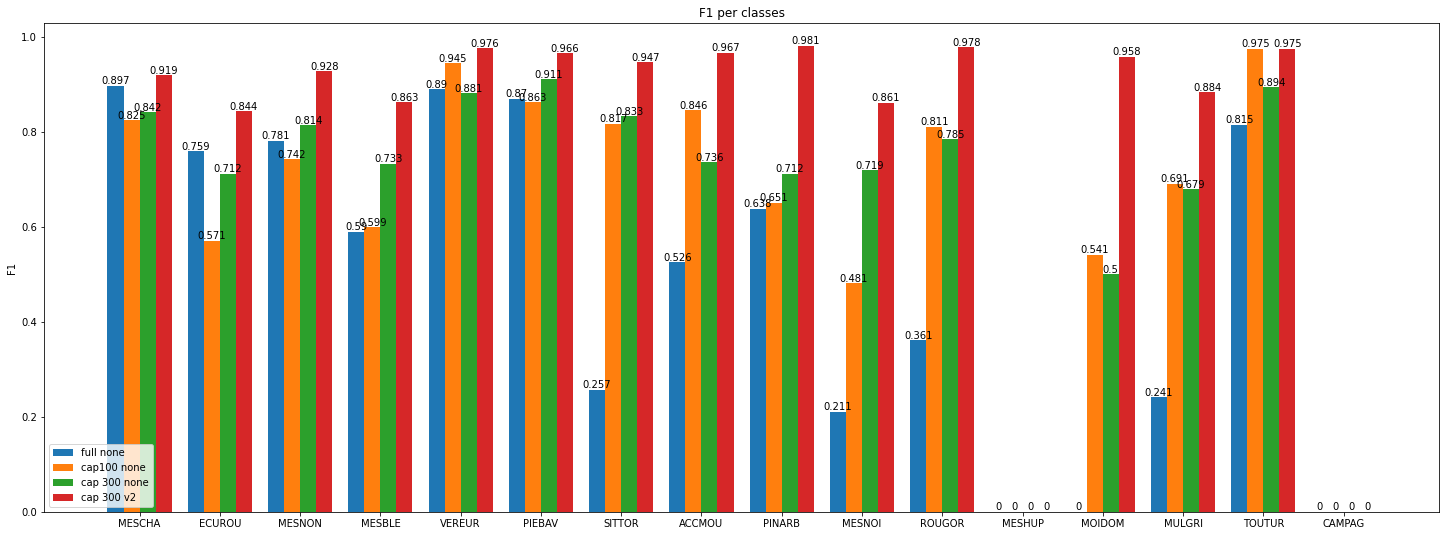

In [90]:
plot_global_metrics(full_none,cap100_none,cap300_none,cap300_v2)

[0.897, 0.257, 0.59, 0.781, 0.638, 0.526, 0.361, 0.89, 0, 0.815, 0.759, 0.87, 0.241, 0, 0.211, 0]
[0.825, 0.817, 0.599, 0.742, 0.651, 0.846, 0.811, 0.945, 0.541, 0.975, 0.571, 0.863, 0.691, 0, 0.481, 0]


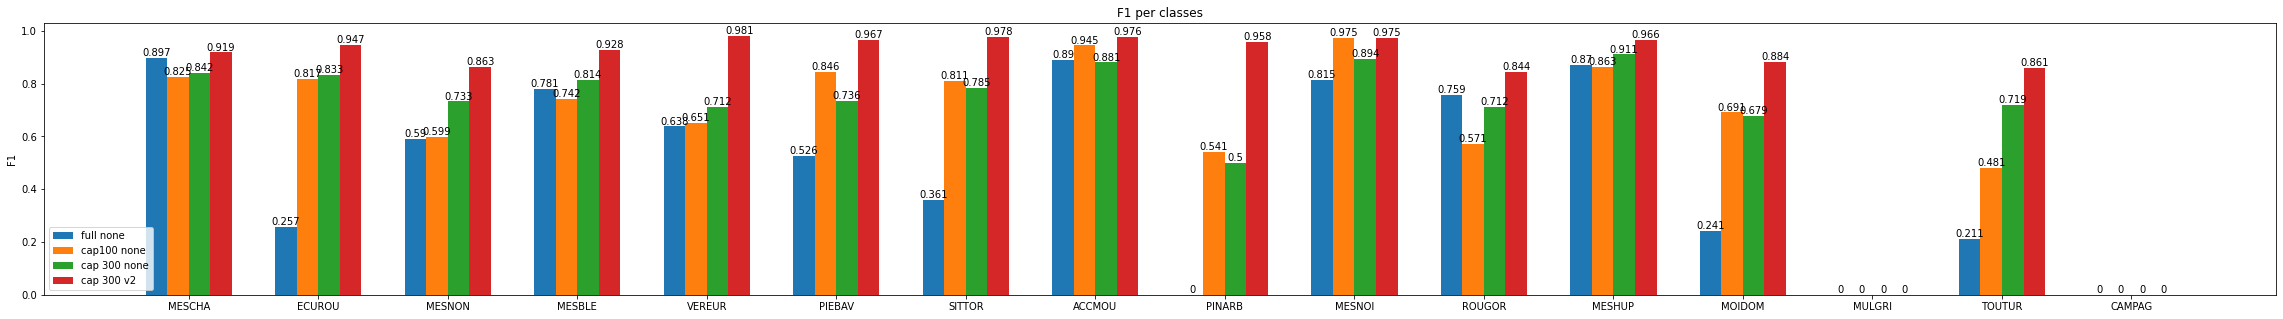

In [64]:
plot_global_metrics(full_none,cap100_none,cap300_none,cap300_v2)